In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

2023-11-30 19:23:30.247546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 19:23:30.295389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 19:23:30.296071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 19:23:31.107506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
df = pd.read_csv("./datasets/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
print("Data shape:")
print(df.shape)
print("Data info:")
print(df.info())

Data shape:
(309, 16)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    in

Class 0: 270
Class 1: 39
Proportion: 6.92 : 1


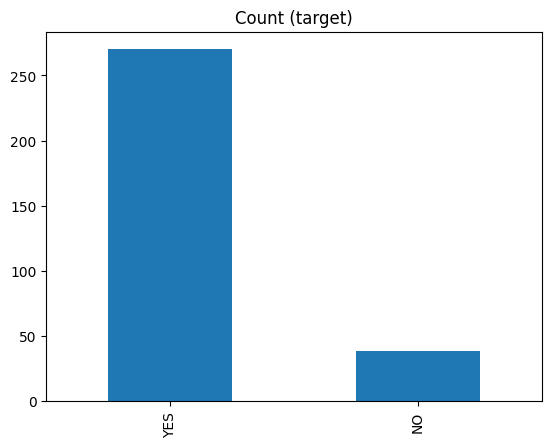

In [6]:
target_count =df['LUNG_CANCER'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# import pickle as pkl
# with open("scaler-lung-cancer.pkl", "wb") as file :
#     pkl.dump(scaler, file)

In [9]:
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [10]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [11]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [14]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,0.827643,0,0,0,1,0,1,0,1,0,1,1,0,1
336,0,-0.577677,1,1,0,1,0,0,0,0,0,0,0,0,1
334,0,0.124983,0,0,0,0,1,1,0,0,0,0,1,0,0
151,0,0.242093,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,2.935622,0,0,0,0,1,1,0,0,0,0,1,0,0


In [17]:
X_train['AGE'].shape

(357,)

In [63]:
import mlflow
import os

mlflow.set_tracking_uri("http://localhost:5000")
os.environ["LOGNAME"] = "ML_flow"
mlflow.set_experiment(experiment_name="Lung_cancer_2")

2023/11/30 21:20:38 INFO mlflow.tracking.fluent: Experiment with name 'Lung_cancer_2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/358283692798248049', creation_time=1701354038474, experiment_id='358283692798248049', last_update_time=1701354038474, lifecycle_stage='active', name='Lung_cancer_2', tags={}>

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import xgboost

lr = LogisticRegression(random_state=96)
rf = RandomForestClassifier(random_state=96)
mnb = GaussianNB()
sv = SVC(random_state=96)
dt = DecisionTreeClassifier(random_state=96)
xg_classifier = xgboost.XGBClassifier()

models = [("LogisticRegression", lr), ("RandomForest", rf), ("SVM", sv), ("DecisionTree", dt), ('GaussianNB', mnb), ('XG_Boost', xg_classifier)]
kfold = KFold(n_splits=5, shuffle=True, random_state=96)

# Loop through models
for model_name, model in models:
    with mlflow.start_run(run_name=model_name):
        # Train and evaluate the model
        score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Log parameters
        mlflow.log_param("model_type", model_name)
        mlflow.log_params(model.get_params())

        # Log metrics
        mlflow.log_metric("accuracy_mean", score.mean())
        mlflow.log_metric("accuracy_std", score.std())

        # Log the trained model as an artifact
        mlflow.sklearn.log_model(model, "model")

        # Define input and output schema
        input_schema = pd.DataFrame(X_train).dtypes.to_dict()
        output_schema = {"prediction": "int"}

        # Log schema information as custom tags
        mlflow.set_tag("input_schema", input_schema)
        mlflow.set_tag("output_schema", output_schema)

        print(f"{model_name} - Scores: {score} - Scores mean: {score.mean()} - Scores std (lower better): {score.std()}")

LogisticRegression - Scores: [0.86111111 0.91666667 0.91549296 0.94366197 0.92957746] - Scores mean: 0.913302034428795 - Scores std (lower better): 0.02802366430108158
RandomForest - Scores: [0.97222222 0.94444444 0.95774648 0.98591549 0.95774648] - Scores mean: 0.9636150234741784 - Scores std (lower better): 0.014197080976578081
SVM - Scores: [0.91666667 0.95833333 0.91549296 0.98591549 0.95774648] - Scores mean: 0.946830985915493 - Scores std (lower better): 0.02709615780377105
DecisionTree - Scores: [0.94444444 0.94444444 0.91549296 0.97183099 0.92957746] - Scores mean: 0.9411580594679186 - Scores std (lower better): 0.018736257303856727
GaussianNB - Scores: [0.83333333 0.91666667 0.88732394 0.95774648 0.88732394] - Scores mean: 0.8964788732394366 - Scores std (lower better): 0.04078296503377273
XG_Boost - Scores: [0.95833333 0.94444444 0.92957746 0.98591549 0.95774648] - Scores mean: 0.9552034428794991 - Scores std (lower better): 0.01861150217882051


# Deep Learning yay!!

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_uniform', input_shape=(15,)),
    Dropout(0.5),  # You can adjust the dropout rate as needed
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=None, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               1600      
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_51 (Dense)            (None, 1)               

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.1915 - accuracy: 0.4706
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1244 - accuracy: 0.4902
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5546
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.5294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.5462
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.5238
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.5854
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.6050
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5994
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6415
Epoch 11/

In [106]:
model.save('my_model.h5')

c:\Users\ll\anaconda3\envs\NLP\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9328

Test accuracy: 0.9327731132507324


In [30]:
model.save('lung-cancer.keras')

In [49]:
type(X_test)

pandas.core.frame.DataFrame

## Inference

In [ ]:
from keras.models import load_model

model_cancer = load_model('lung-cancer.keras')

In [51]:
my_values = '''
{
  "GENDER": "0",
  "AGE": "-0.086017",
  "SMOKING": "0",
  "YELLOW_FINGERS": "0",
  "ANXIETY": "0",
  "PEER_PRESSURE": "0",
  "CHRONIC DISEASE": "1",
  "FATIGUE": "1",
  "ALLERGY": "0",
  "WHEEZING": "0",
  "ALCOHOL CONSUMING": "0",
  "COUGHING": "1",
  "SHORTNESS OF BREATH": "0",
  "SWALLOWING DIFFICULTY": "0",
  "CHEST PAIN": "0"
}
'''

In [52]:
import json
import numpy as np

data_dict = json.loads(my_values)
values = [float(value) for value in data_dict.values()]
numpy_array = np.array(values)

print(numpy_array)

[ 0.       -0.086017  0.        0.        0.        0.        1.
  1.        0.        0.        0.        1.        0.        0.
  0.      ]


In [54]:
print(f"Can has a chance to be lung cancer at {model.predict(numpy_array.reshape(1,-1)).item()*100:.2f} percent")

1/1 [==============================] - 0s 15ms/step
Can has a chance to be lung cancer at 36.54 percent
